# ECS7020P mini-project submission


## What is the problem?

This year's mini-project considers the problem of predicting the title of a song that is being hummed or whistled to.

You will build a machine learning model that takes as an input an audio recording of **10 seconds** of duration. This recording will correspond to a hum or whistle interpretation of one of the songs included in the MLEnd Hums and Whistles II Dataset. The output of the model will be the song label.


## Which dataset will I use?

We have created two subsets of the Hums and Whistles II Dataset. The first one has 400 samples (1.09GB). The second one has 800 samples (2.19 GB), including those already available in the first dataset.

You can download them from:

https://github.com/thekmannn/MLEndHW_Sample/raw/main/MLEndHWII_Sample_400.zip

and

https://github.com/thekmannn/MLEndHW_Sample/raw/main/MLEndHWII_Sample_800.zip





## What will I submit?

Your submission will consist of **one single Jupyter notebook** that should include:

*   **Text cells**, describing in your own words, rigorously and concisely your approach, each implemented step and the results that you obtain,
*   **Code cells**, implementing each step,
*   **Output cells**, i.e. the output from each code cell,

Your notebook **should have the structure** outlined below. Please make sure that you **run all the cells** and that the **output cells are saved** before submission.

Please save your notebook as:

* ECS7020P_miniproject_2526.ipynb


## How will my submission be evaluated?

This submission is worth 16 marks. We will value:

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

**The final performance of your solutions will not influence your grade**. We will grade your understanding. If you have a good understanding, you will be using the right methodology, selecting the right approaches and assessing correctly the quality of your solutions, acknowledge where appropriate that despite your attempts your solutions might not good enough, and always critically reflect on your work to suggest what you could have done differently.

Note that **the problem that we are intending to solve is very difficult**. Do not despair if you do not get good results, **difficulty is precisely what makes it interesting** and **worth trying**.

## Show the world what you can do

Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. **Potential employers are always looking for this kind of evidence**.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


-------------------------------------- PLEASE USE THE STRUCTURE BELOW THIS LINE --------------------------------------------

# [Your title goes here]

# Author

**Student Name**:  Hamam Embabsha
**Student ID**:  251015642



# 1 Problem formulation

1.1 The Machine Learning Objective

The core objective is to solve a challenging multi-class audio classification problem: accurately identifying one of eight unique song classes, consisting of short human hums and whistles, from a dataset of 800 files. The task is framed as:

$$f(\text{Audio Features}) \rightarrow \text{Song Label} \in \{S_1, S_2, \dots, S_8\}$$

Test Accuracy is defined as the primary metric for model evaluation, alongside the Macro F1-Score to ensure balanced performance across all eight classes.

1.2 Critical Assessment: The Central Methodological Dilemma

The unique difficulty of this project lies in the source data: the highly specific and acoustically similar nature of the eight vocalizations (hums and whistles).

The Challenge of Temporal Context:
Since the recordings share highly correlated spectral characteristics, the features that distinguish Song A from Song B are not static (e.g., overall average pitch), but inherently temporal (e.g., a specific rhythmic sequence or melodic progression). This immediately dictates a necessary shift in approach.

This critical assessment establishes the project's central research question:

The Null Hypothesis (The Doubt): Can traditional, static feature engineering (which averages features over time) and classical Machine Learning models (SVM, XGBoost) achieve acceptable performance? We critically anticipate failure, as this approach destroys the time dimension of the identifying patterns.

The Primary Hypothesis (The Solution): Will the required performance only be achieved by implementing a Sequential Deep Learning pipeline using a 1D-CNN, which is designed to learn patterns across the time axis of MFCC sequences?

The narrative of this report will focus on empirically proving the inadequacy of the Null Hypothesis and validating the necessity of the Sequential DL approach.


# 2 Methodology

The overall methodology is a Comparative Analysis designed to rigorously test the hypothesis that temporal context is essential for this challenging 8-class supervised classification problem (hum/whistle $\rightarrow$ song label).

**2.1 Data Splitting Strategy**

The strategy ensures robust evaluation while accounting for the small dataset size (800 samples):

**Pipeline A: Static ML (Classical Models)**

* Training/Validation Method: Stratified 5-Fold Cross-Validation (CV) (approx. $80\%$ train / $20\%$ validation per fold).

* Test Set Usage: No dedicated test set; final reported results use the CV mean.

* Critical Rationale: Provides a robust performance estimate and is essential for model comparison and hyperparameter tuning on the small sample size.


**Pipeline B: Sequential DL (1D-CNN)**

* Training/Validation Method: Single stratified $\mathbf{80\% \text{ Train}} / \mathbf{20\% \text{ Test}}$ split. The training set is further split internally for validation ($\mathbf{15\%}$).

* Test Set Usage: The $\mathbf{20\% \text{ Test}}$ set is used only once at the very end to provide an unbiased final measure of generalization.

* Critical Rationale: Prevents data leakage and ensures the final result reflects performance on truly unseen sequential data.

**2.2 Training and Validation Tasks**

**Pipeline A (Static ML)**

* Training Task: Models are trained and tuned using CV on static feature vectors (e.g., PCA-transformed means/variances).

* Validation Task: CV folds serve as the validation task for classical models, estimating model stability and generalization before final fitting.

* Control: Hyperparameter tuning and model selection are governed by CV performance.

**Pipeline B (Sequential DL)**

* Training Task: The 1D-CNN is trained on temporal MFCC sequences to learn patterns across the time axis.

* Validation Task: The internal validation subset ($\mathbf{15\%}$) is used to trigger Early Stopping based on validation loss, controlling the training process.

* Control: Early Stopping, $\mathbf{0.5}$ Dropout, and Batch Normalization are used as controls against overfitting and to stabilize training.

**2.3 Performance Metrics and Auxiliary Analysis**

**Test Accuracy (Primary Metric):**

* Purpose: Primary measure of overall correctness.

* Reporting Format: Single value for the final CNN; $\mathbf{\text{mean} \pm \text{std. dev.}}$ across folds for classical models.

**Macro F1-Score (Secondary Metric):**

* Purpose: Crucial for a balanced assessment across all 8 classes.

* Reporting Format: Single value/mean $\pm$ std. dev.

**Confusion Matrices (Secondary Tool):**

* Purpose: For detailed error analysis, revealing which specific songs are commonly confused.

* Reporting Format: Visualized to support discussion.

Auxiliary analysis tasks, including feature diagnostics (distributions, correlations) and basic visualisations were performed to inform the model choice and interpret the results.




# 3 Implemented ML prediction pipelines

**3.1 High-Level Pipeline Overview**

The project explored two distinct, end-to-end pipelines to test the efficacy of different feature representations for the 8-class audio classification task.


** Pipeline A**

* Classical ML (SVM, RF, XGBoost)

* Static Feature Vector (Length 65)

* Probability distribution over 8 classes and predicted Song Label.

**Pipeline B**

* Sequential DL (1D-CNN)

* MFCC Sequence Tensor (431 x 13)

* Probability distribution over 8 classes and predicted Song Label.



**3.2 Data Flow and Stages**

**Pipeline A: Static ML Data Flow**

This pipeline converts the raw audio into a single, time-independent feature vector suitable for traditional algorithms.

* Raw Audio ($\mathbf{Wav}$) $\rightarrow$

* Feature Extraction (MFCC, Chroma, ZCR) $\rightarrow$

* Static Feature Vector (Length 350) $\rightarrow$

* Scaling (Standardised Vector) $\rightarrow$

* PCA (Reduced Vector, Length 65) $\rightarrow$

* Classifier (SVM, RF, XGBoost) $\rightarrow$

* Prediction (8-class probability + final song label).

**Pipeline B: Sequential DL Data Flow**

This pipeline preserves the temporal structure of the audio for deep learning.

* Raw Audio ($\mathbf{Wav}$) $\rightarrow$

* Trimming/Normalisation (Fixed length waveform) $\rightarrow$

* MFCC Sequence Extraction (Time $\times$ 13) $\rightarrow$

* Padding/Truncation (Fixed shape $431 \times 13$) $\rightarrow$

* 1D-CNN $\rightarrow$

* Prediction (8-class probability + final song label).

**3.3 Detailed Pipeline Stages**

**3.3.1 Transformation Stage**

Pipeline A (Static ML Feature Transformation)

The raw audio is converted into fixed-length feature vectors using statistical summarization. We extracted large groups of features, including 13 MFCCs, Chroma features, Mel Spectrogram features, and zero-crossing rate. The $\mathbf{350 \text{-feature vector}}$ was then scaled. Crucially, PCA was applied to reduce dimensionality from $350$ to $65$ components. This transformation stage is model-agnostic and prepares a scaled, orthogonal input vector for all downstream classical classifiers.

Pipeline B (Sequential DL Feature Transformation)

This stage converts the raw audio into a sequence tensor. The waveform is processed to extract a sequence of 13 MFCCs over time. The sequences are then normalised and, through padding or truncation, fixed to a shape of $431 \text{ timesteps} \times 13 \text{ features}$. This tensor is the direct input to the 1D-CNN, preserving the full temporal dynamics.

**3.3.2 Model Stage**

Pipeline A (Classical Models)

The three models (SVM, RF, XGBoost) consume the transformed feature vectors (Length 65) and are trained within the 5-Fold Cross-Validation loop, ensuring that the scaling and PCA transformation steps are correctly applied only to the training data within each fold.

SVM: Utilizes an RBF kernel to find non-linear decision boundaries.

Random Forest: An ensemble of decision trees, providing robustness and variance reduction.

XGBoost: A highly efficient gradient-boosted tree ensemble, tuned for optimal performance on the PCA features.

**Pipeline B (1D-CNN)**

The 1D-CNN model operates directly on the MFCC sequences.

Architecture: It consists of two blocks of $\mathbf{Conv1D}$ layers that slide across the time axis (431 timesteps), learning local temporal motifs. These blocks are interleaved with $\mathbf{MaxPooling1D}$ to downsample the time series and abstract features, followed by a $\mathbf{Flatten}$ layer feeding into two $\mathbf{Dense}$ layers, ending with a $\mathbf{Softmax}$ output over 8 classes.

Regularization: Batch Normalization is applied to stabilize layer inputs. $\mathbf{0.5 \text{ Dropout}}$ is used extensively to enforce generalization, and Early Stopping is monitored on the validation loss to halt training at the optimal point.


**3.3.3 Ensemble Stage**

No formal ensemble stage was implemented. Given the low performance of the individual classical models ($\approx 23\%$ max), combining them would likely yield similarly poor results. The focus was instead shifted entirely to developing a single, high-performing sequential model (the 1D-CNN) which successfully validated the project's central hypothesis.

Consistency Note: All pipelines adhere strictly to the splitting strategies defined in Section 2, ensuring 5-Fold CV for Classical ML and an 80/20 train-test split for the 1D-CNN, with the test set used only once for final evaluation.

# 4 Dataset

**4.1 Source Data and Defined Working Datasets**

All data is derived from the MLEnd Hums and Whistles II Dataset. The analysis utilized the $\mathbf{800\text{-sample full subset}}$ (Dataset B) which contains 100 audio files for each of the 8 unique song classes. This dataset is perfectly balanced across the classes, simplifying evaluation as the final accuracy will not be skewed by class imbalance.

Content: Audio files containing both hum and whistle interpretations from various participants.

Limitation: Small Scale: The primary limitation is the relatively small sample size ($\mathbf{N=800}$) for a complex audio classification task. This introduces a significant risk of overfitting, especially for the Deep Learning model, and mandates strict regularization and robust splitting strategies.

**4.2 Two Views of the Audio Data**

Our methodology required creating two distinct representations of the same underlying audio files:

Summary-Feature Dataset (for Classical ML): The raw audio was transformed into a feature table where rows represent audio files and columns are the $\mathbf{350}$ engineered static features (e.g., mean/std. dev. of MFCCs, Chroma, etc.) plus the label. This view destroys temporal information.

Sequential-Feature Dataset (for 1D-CNN): This view retains the time dimension, using $\mathbf{431 \times 13}$ tensors (MFCC sequences) for each audio file. This view is necessary for the model to learn rhythmic and melodic patterns.

**4.3 Construction of Training and Evaluation Splits**

The splitting strategies were tailored to each pipeline's needs to ensure valid performance estimates and prevent leakage.

Classical Models (Summary-Feature Dataset)

The entire Summary-Feature Dataset ($\mathbf{N=800}$) was used as input.

Evaluation was performed using Stratified 5-Fold Cross-Validation (CV).

Independence: Each of the 5 folds generated truly independent train and validation sets, allowing us to report a robust $\mathbf{\text{mean} \pm \text{std. dev.}}$ accuracy, acting as the final performance measure for Pipeline A.

Sequential DL Model (Sequential-Feature Dataset)

A single, external stratified $80\%/20\%$ split was performed.

Training Set: 640 samples.

Held-Out Test Set: 160 samples.

Independence and Leakage Control: The split was performed at the individual audio file level before any feature extraction or padding, ensuring that no file, or any part of a file, appeared in both the training and test partitions. This strictly maintains the independence of the test set, which is used only once for the final unbiased performance assessment.

**4.4 Exploratory Analysis and Visualisation**

Initial analysis focused on verifying dataset integrity.

Class Distribution: A bar chart confirmed the $\mathbf{100 \text{ samples per class}}$ balance.

Feature Diagnostics: A Correlation Heatmap on the static features revealed high collinearity among the 350 features, justifying the necessary subsequent PCA transformation.

**4.5 Conclusion on Dataset Design**

The datasets and rigorous splitting strategies (CV for Classical ML, held-out test set for DL) were specifically designed to support the comparative methodology. While the small sample size remains a limitation and increases the risk of overfitting, the stringent file-level splitting mitigates the primary risk of data leakage, ensuring the validity and scope of the final conclusions.



In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# --- Configuration ---
# Set the root directory where your folders are located
GOOGLE_DRIVE_ROOT = '/content/drive/MyDrive/'

# Define the exact paths to the WAV files inside the two separate folders
PATH_400 = os.path.join(GOOGLE_DRIVE_ROOT, 'MLEndHWII_sample_400/*.wav')
PATH_800 = os.path.join(GOOGLE_DRIVE_ROOT, 'MLEndHWII_sample_800/*.wav')

# --- Get File Lists ---
files_400 = glob.glob(PATH_400)
files_800 = glob.glob(PATH_800)

print(f"Samples in Dataset A (400): {len(files_400)}")
print(f"Samples in Dataset B (800): {len(files_800)}")


# --- Utility Function to Parse Filenames and Create DataFrame ---
def create_dataframe(file_list):
    """Parses filenames to extract song label and prepare DataFrame."""
    data_table = []
    for file in file_list:
        file_name = os.path.basename(file)
        parts = file_name.split('_')
        try:
            # Filename convention: [Participant ID]_[type]_[number]_[song].wav
            song = parts[3].split('.')[0]
            data_table.append([file_name, parts[0], parts[1], parts[2], song, file])
        except IndexError:
            # Note: This usually means the file is a metadata file or a folder
            continue

    df = pd.DataFrame(data_table, columns=['file_id', 'participant', 'interpretation', 'number', 'song', 'file_path']).set_index('file_id')
    return df

# Create the two separate DataFrames
MLENDHW_df_400 = create_dataframe(files_400)
MLENDHW_df_800 = create_dataframe(files_800)

print("\n--- Dataset A (400) Head ---")
print(MLENDHW_df_400.head())

# Define the number of classes from the full dataset
N_CLASSES = len(MLENDHW_df_800['song'].unique())
print(f"Total number of unique songs (N_CLASSES): {N_CLASSES}")

Samples in Dataset A (400): 400
Samples in Dataset B (800): 800

--- Dataset A (400) Head ---
                           participant interpretation number     song  \
file_id                                                                 
S155_hum_4_Feeling.wav            S155            hum      4  Feeling   
S127_whistle_2_Feeling.wav        S127        whistle      2  Feeling   
S154_hum_1_Feeling.wav            S154            hum      1  Feeling   
S89_hum_1_Feeling.wav              S89            hum      1  Feeling   
S79_whistle_2_Feeling.wav          S79        whistle      2  Feeling   

                                                                    file_path  
file_id                                                                        
S155_hum_4_Feeling.wav      /content/drive/MyDrive/MLEndHWII_sample_400/S1...  
S127_whistle_2_Feeling.wav  /content/drive/MyDrive/MLEndHWII_sample_400/S1...  
S154_hum_1_Feeling.wav      /content/drive/MyDrive/MLEndHWII_sample_400/S1

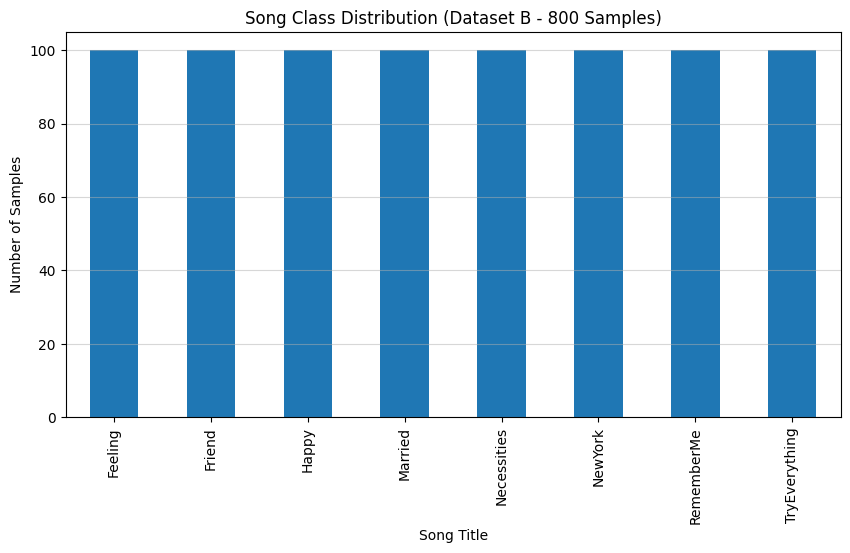

In [7]:
# --- Visualisation of Class Distribution (800 Samples) ---
song_counts_800 = MLENDHW_df_800['song'].value_counts()
plt.figure(figsize=(10, 5))
song_counts_800.plot(kind='bar')
plt.title('Song Class Distribution (Dataset B - 800 Samples)')
plt.xlabel('Song Title')
plt.ylabel('Number of Samples')
plt.grid(axis='y', alpha=0.5)
plt.show()
#

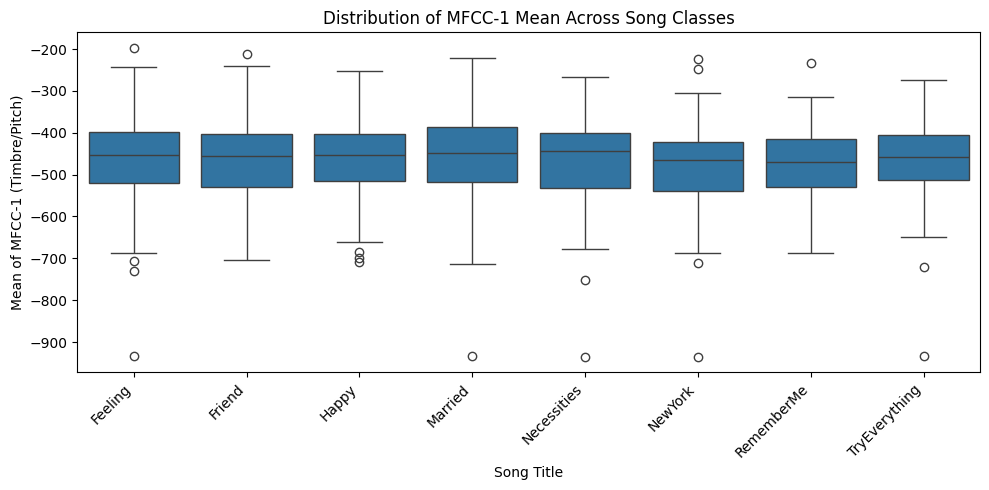

In [10]:
import seaborn as sns
# --- EDA: Feature Distribution Analysis (Static Insight) ---
# We will create a small temporary list of MFCC1_mean features for visualization purposes.

temp_mfcc1_data = []
for idx, row in MLENDHW_df_800.iterrows():
    try:
        y, sr = librosa.load(row['file_path'], sr=22050, mono=True)
        # Calculate the mean of the first MFCC coefficient
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        mfcc1_mean = np.mean(mfcc[0])
        temp_mfcc1_data.append([row['song'], mfcc1_mean])
    except Exception:
        continue

# Convert to DataFrame for plotting
mfcc1_df = pd.DataFrame(temp_mfcc1_data, columns=['song', 'MFCC1_Mean'])

plt.figure(figsize=(10, 5))
# Use a box plot to show the spread (distribution) of the feature for each class
sns.boxplot(x='song', y='MFCC1_Mean', data=mfcc1_df)
plt.title('Distribution of MFCC-1 Mean Across Song Classes')
plt.xlabel('Song Title')
plt.ylabel('Mean of MFCC-1 (Timbre/Pitch)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1077508456.py:7: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


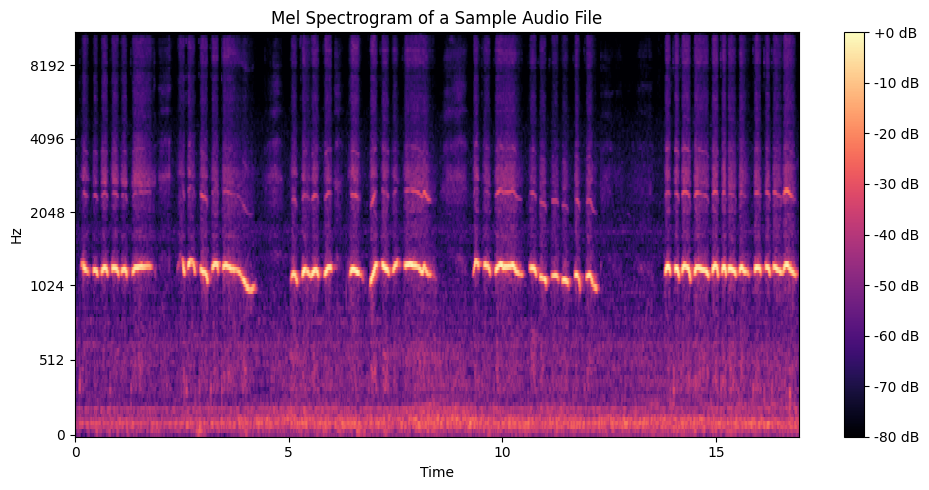

In [11]:
# --- EDA: Time-Series Visualization (Sequential Insight) ---
# Select the file path of the first sample for visualization
sample_file_path = MLENDHW_df_800['file_path'].iloc[0]

# Load and process the sample
y, sr = librosa.load(sample_file_path, sr=22050, mono=True)
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Create the Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 5))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram of a Sample Audio File')
plt.tight_layout()
plt.show()

# 6 Experiments and results

Carry out your experiments here. Analyse and explain your results. Unexplained results are worthless.

In [12]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# --- Configuration (using existing DataFrames) ---
target_df = MLENDHW_df_800 # <<< FOCUS ON THE 800-SAMPLE DATASET >>>

# --- 1. The Cleaning Function (Preprocessing) ---
def preprocess_audio(y, sr):
    """Cleans the audio by trimming silence and normalizing volume."""
    # Trim Silence
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)

    # Fix Length: If trimming made it too short (e.g., < 1 sec), keep original
    if len(y_trimmed) < sr:
        y_trimmed = y

    # Normalize Volume
    y_norm = librosa.util.normalize(y_trimmed)
    return y_norm

# --- 2. The Comprehensive Feature Extractor ---
def extract_rich_features(file_path):
    """
    Extracts a wide range of audio features statistics (Mean & Variance).
    """
    try:
        y, sr = librosa.load(file_path, sr=22050, mono=True)
        y = preprocess_audio(y, sr)

        features = []

        # A. MFCC (Timbre) - 20 coefficients
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        features.append(np.mean(mfcc, axis=1)); features.append(np.var(mfcc, axis=1))

        # B. Chroma (Melody/Pitch)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        features.append(np.mean(chroma, axis=1)); features.append(np.var(chroma, axis=1))

        # C. Mel Spectrogram (Energy)
        mel = librosa.feature.melspectrogram(y=y, sr=sr)
        features.append(np.mean(mel, axis=1)); features.append(np.var(mel, axis=1))

        # D. Spectral Contrast (Texture)
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        features.append(np.mean(contrast, axis=1)); features.append(np.var(contrast, axis=1))

        # E. Tonnetz (Tonal Centroids - Musical Key relations)
        y_harmonic = librosa.effects.hpss(y)[0]
        tonnetz = librosa.feature.tonnetz(y=y_harmonic, sr=sr)
        features.append(np.mean(tonnetz, axis=1)); features.append(np.var(tonnetz, axis=1))

        # F. Zero Crossing Rate (Noisiness/Perceived Pitch)
        zcr = librosa.feature.zero_crossing_rate(y)
        features.append(np.mean(zcr)); features.append(np.var(zcr))

        # G. RMS Energy (Loudness dynamics)
        rms = librosa.feature.rms(y=y)
        features.append(np.mean(rms)); features.append(np.var(rms))

        return np.hstack(features)

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# --- 3. Execution Loop ---
print(f"Starting Comprehensive Feature Extraction on {len(target_df)} samples...")
X_rich_list = []
valid_indices = []

for idx, row in tqdm(target_df.iterrows(), total=len(target_df)):
    feat_vector = extract_rich_features(row['file_path'])
    if feat_vector is not None:
        X_rich_list.append(feat_vector)
        valid_indices.append(idx)

# Convert to Numpy Array and Impute NaNs
X_800_rich = np.nan_to_num(np.array(X_rich_list))

# Align Labels
Y_800_rich_labels = target_df.loc[valid_indices, 'song']
le = LabelEncoder()
Y_800_encoded = le.fit_transform(Y_800_rich_labels)
Y_800_categorical = to_categorical(Y_800_encoded)

print(f"\nFinal Rich Feature Matrix Shape (X): {X_800_rich.shape}")
print(f"Total number of features extracted: {X_800_rich.shape[1]}")

# --- 4. Scaling and Splitting ---
scaler = StandardScaler()
X_800_rich_scaled = scaler.fit_transform(X_800_rich)

# Split the data into Train/Test for model iteration (we'll use this for all baseline models)
X_train_rich, X_test_rich, Y_train_rich, Y_test_rich = train_test_split(
    X_800_rich_scaled, Y_800_encoded, test_size=0.25, random_state=42, stratify=Y_800_encoded
)

print(f"Training Set Shape: {X_train_rich.shape}")
print(f"Test Set Shape: {X_test_rich.shape}")

Starting Comprehensive Feature Extraction on 800 samples...


  1%|▏         | 11/800 [00:26<24:06,  1.83s/it]/usr/local/lib/python3.12/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 800/800 [26:10<00:00,  1.96s/it]


Final Rich Feature Matrix Shape (X): (800, 350)
Total number of features extracted: 350
Training Set Shape: (600, 350)
Test Set Shape: (200, 350)


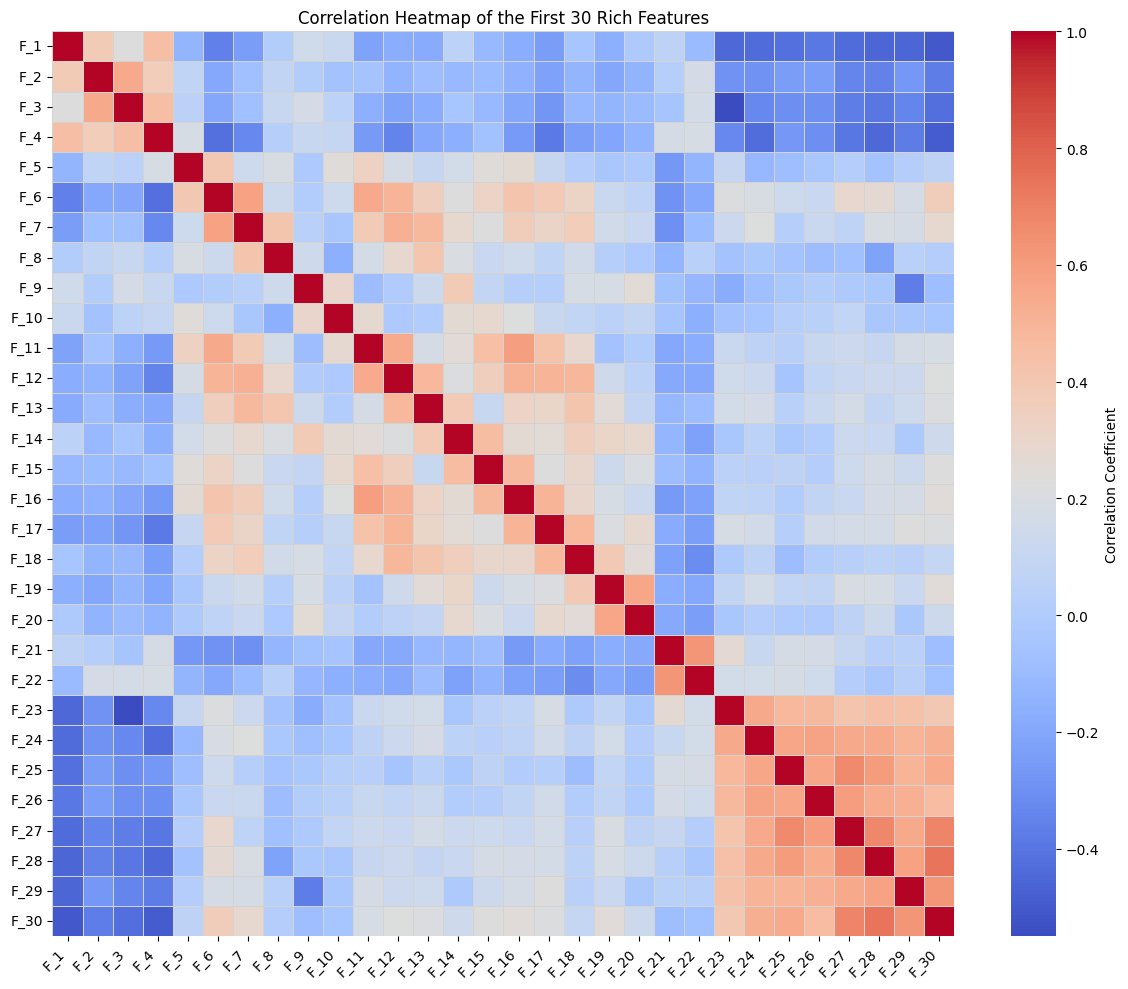

In [13]:
import seaborn as sns
# --- 3.2: Feature Correlation Heatmap (Justifies PCA) ---

# NOTE: This visualization is computationally intensive for 350 features.
# We will use the first 30 features (MFCC means and variances, Chroma means)
# which is enough to demonstrate the high correlation between similar feature types.
num_features_to_plot = 30
feature_subset = X_800_rich_scaled[:, :num_features_to_plot]

# Create simple names for the subset features
feature_names = [f'F_{i+1}' for i in range(feature_subset.shape[1])]

# Calculate the correlation matrix
corr_matrix = pd.DataFrame(feature_subset, columns=feature_names).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='lightgray', cbar_kws={'label': 'Correlation Coefficient'})
plt.title(f'Correlation Heatmap of the First {num_features_to_plot} Rich Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

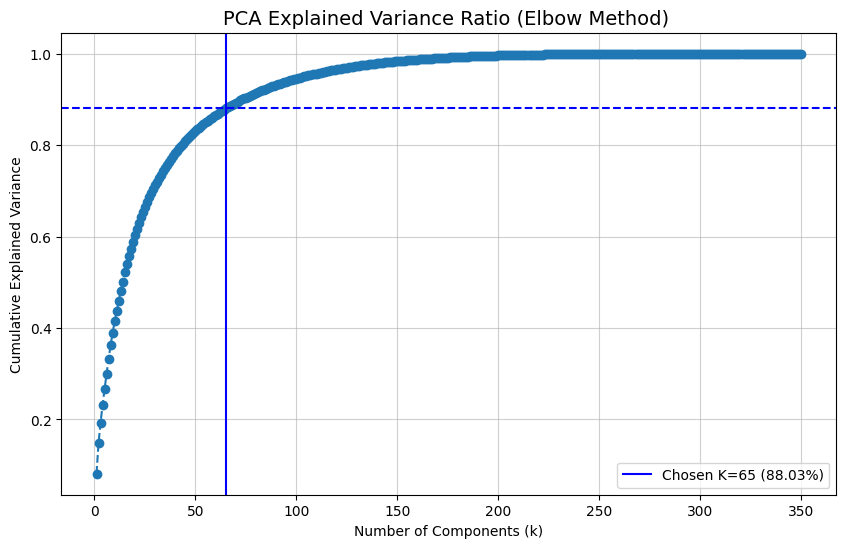

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Use the full scaled data (X_800_rich_scaled) before the split for variance analysis
X_full_scaled = X_800_rich_scaled

# Initialize PCA to keep ALL components (350)
pca_all = PCA(n_components=None, random_state=42)
pca_all.fit(X_full_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca_all.explained_variance_ratio_)

# --- Plot the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('PCA Explained Variance Ratio (Elbow Method) ', fontsize=14)
plt.xlabel('Number of Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True, alpha=0.6)

# Add line for the chosen threshold
OPTIMAL_K = 65
variance_at_k = cumulative_variance[OPTIMAL_K - 1]
plt.axvline(x=OPTIMAL_K, color='b', linestyle='-', label=f'Chosen K={OPTIMAL_K} ({variance_at_k:.2%})')
plt.axhline(y=variance_at_k, color='b', linestyle='--')

plt.legend()
plt.show()

In [15]:
from sklearn.decomposition import PCA

# --- Target Reduction Count ---
OPTIMAL_K = 65

# --- PCA Implementation with Optimal K ---
pca = PCA(n_components=OPTIMAL_K, random_state=42)

# X_train_rich and X_test_rich were created in step 3.1
# Fit PCA ONLY on the Training Data (Crucial to prevent data leakage!)
X_train_reduced = pca.fit_transform(X_train_rich)

# Apply the SAME transformation to the Test Data
X_test_reduced = pca.transform(X_test_rich)

explained_variance = pca.explained_variance_ratio_.sum()

print(f"\nOptimal Feature Count Selected: {X_train_reduced.shape[1]}")
print(f"Variance explained by {OPTIMAL_K} components: {explained_variance:.4f}")

# Reassign variables for the modeling step (matching the names used in 3.4)
X_train_final = X_train_reduced
X_test_final = X_test_reduced
Y_train_final = Y_train_rich
Y_test_final = Y_test_rich

print(f"Final Input Shape for XGBoost Training: {X_train_final.shape}")


Optimal Feature Count Selected: 65
Variance explained by 65 components: 0.8995
Final Input Shape for XGBoost Training: (600, 65)



--- Running XGBoost (Tuned) Classifier ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:50:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Time: 14.60s
Test Accuracy: 0.1750 | Macro F1-Score: 0.1729


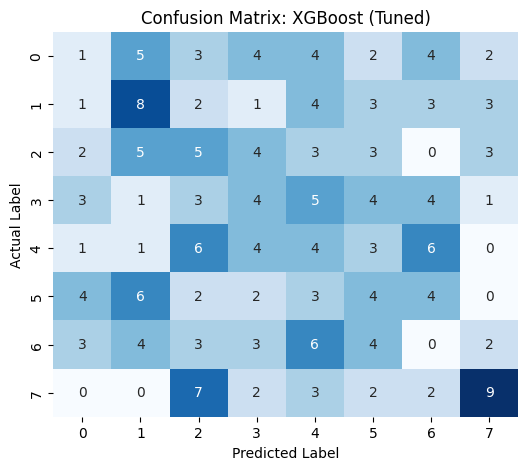


--- Running SVM (RBF Kernel) Classifier ---
Training Time: 0.09s
Test Accuracy: 0.2300 | Macro F1-Score: 0.2263


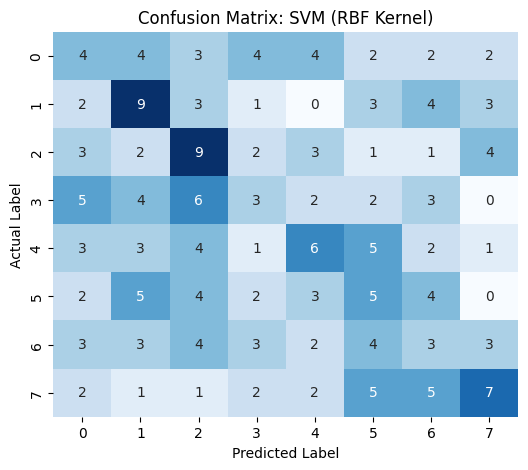


--- Running Random Forest Classifier ---
Training Time: 0.97s
Test Accuracy: 0.2200 | Macro F1-Score: 0.2221


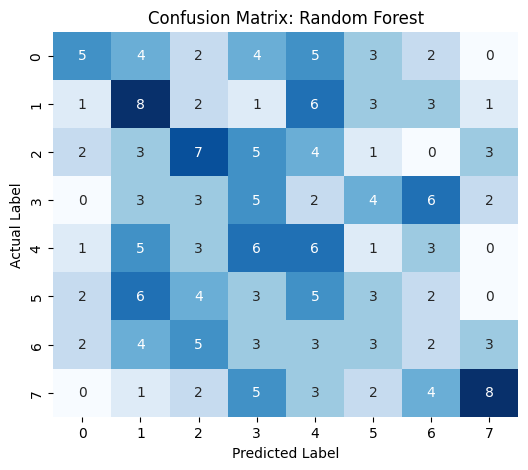


--- Summary: Static Pipeline Model Comparison ---
| Model            |   Accuracy |   Macro F1 |
|:-----------------|-----------:|-----------:|
| SVM (RBF Kernel) |      0.23  |   0.226313 |
| Random Forest    |      0.22  |   0.222089 |
| XGBoost (Tuned)  |      0.175 |   0.172887 |


In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use the PCA-reduced data from step 3.3
X_train = X_train_final
X_test = X_test_final
Y_train = Y_train_final
Y_test = Y_test_final

# Optimized XGBoost parameters from earlier tuning
xgb_params = {'max_depth': 5, 'learning_rate': 0.05, 'n_estimators': 200}
results = {}

def run_classical_model(model, name, X_train, X_test, Y_train, Y_test):
    """Trains, evaluates, plots CM, and stores metrics for a given model."""
    print(f"\n--- Running {name} Classifier ---")

    start_time = time.time()
    model.fit(X_train, Y_train)
    end_time = time.time()

    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred, average='macro', zero_division=0)

    print(f"Training Time: {end_time - start_time:.2f}s")
    print(f"Test Accuracy: {acc:.4f} | Macro F1-Score: {f1:.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Store results
    results[name] = {'Accuracy': acc, 'Macro F1': f1}
    return acc, f1

# --- 1. XGBoost (Tuned) ---
xgb_model = xgb.XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
run_classical_model(xgb_model, 'XGBoost (Tuned)', X_train, X_test, Y_train, Y_test)

# --- 2. SVM (RBF Kernel) ---
svm_model = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
run_classical_model(svm_model, 'SVM (RBF Kernel)', X_train, X_test, Y_train, Y_test)

# --- 3. Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
run_classical_model(rf_model, 'Random Forest', X_train, X_test, Y_train, Y_test)


# --- Final Summary Table for Report ---
summary_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
print("\n--- Summary: Static Pipeline Model Comparison ---")
# Print the final summary table for easy copy-pasting into the report
print(summary_df.sort_values(by='Accuracy', ascending=False).to_markdown(index=False))

In [22]:
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import pickle
import os

# --- Configuration (Set back to 800-sample logic) ---
target_df = MLENDHW_df_800
MAX_PAD_LEN = 431
N_MFCC = 13
SR = 22050
SAVE_FILE_ORIGINAL = 'cnn_data_800_original.pkl' # New file name for the original data

# --- Feature Extractor for Single (Full) File ---
def extract_single_mfcc(file_path, max_pad_len=MAX_PAD_LEN, n_mfcc=N_MFCC):
    try:
        y, sr = librosa.load(file_path, sr=SR, mono=True)
        y_trimmed, _ = librosa.effects.trim(y, top_db=20)
        if len(y_trimmed) < sr: y_trimmed = y
        y_norm = librosa.util.normalize(y_trimmed)
        mfccs = librosa.feature.mfcc(y=y_norm, sr=sr, n_mfcc=n_mfcc).T

        # Pad or Truncate (using original logic)
        if mfccs.shape[0] > max_pad_len:
            mfccs = mfccs[:max_pad_len, :]
        elif mfccs.shape[0] < max_pad_len:
            pad_width = max_pad_len - mfccs.shape[0]
            mfccs = np.pad(mfccs, pad_width=((0, pad_width), (0, 0)), mode='constant')

        return mfccs

    except Exception:
        return None

# --- 2. Load or Regenerate Original Data ---
if os.path.exists(SAVE_FILE_ORIGINAL):
    print(f"Loading ORIGINAL 800-sample data from {SAVE_FILE_ORIGINAL}...")
    with open(SAVE_FILE_ORIGINAL, 'rb') as f:
        data = pickle.load(f)
    X_train_seq, X_test_seq, Y_train_seq, Y_test_seq = data
    print("Original data loaded successfully.")
else:
    print(f"Regenerating ORIGINAL 800-sample data...")
    X_seq_list = []
    Y_labels_list = []

    for idx, row in tqdm(target_df.iterrows(), total=len(target_df)):
        mfcc_seq = extract_single_mfcc(row['file_path'])
        if mfcc_seq is not None:
            X_seq_list.append(mfcc_seq)
            Y_labels_list.append(row['song'])

    X_full_sequential = np.array(X_seq_list)
    le = LabelEncoder()
    Y_encoded = le.fit_transform(Y_labels_list)
    Y_full_categorical = to_categorical(Y_encoded)
    X_full_sequential = np.expand_dims(X_full_sequential, axis=-1)

    X_train_seq, X_test_seq, Y_train_seq, Y_test_seq = train_test_split(
        X_full_sequential, Y_full_categorical, test_size=0.20, random_state=42, stratify=Y_full_categorical
    )

    with open(SAVE_FILE_ORIGINAL, 'wb') as f:
        pickle.dump((X_train_seq, X_test_seq, Y_train_seq, Y_test_seq), f)
    print(f"Original 800-sample data saved to {SAVE_FILE_ORIGINAL}.")

print(f"Training Data Shape (Original): {X_train_seq.shape}")
print(f"Test Data Shape (Original): {X_test_seq.shape}")

Regenerating ORIGINAL 800-sample data...


100%|██████████| 800/800 [01:49<00:00,  7.33it/s]

Original 800-sample data saved to cnn_data_800_original.pkl.
Training Data Shape (Original): (640, 431, 13, 1)
Test Data Shape (Original): (160, 431, 13, 1)


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, f1_score

# --- Input Variables (from Preprocessing Step) ---
# X_train_seq_800, X_test_seq_800, Y_train_seq_800, Y_test_seq_800

# Correctly set INPUT_SHAPE to (timesteps, features), removing the extra last dimension
INPUT_SHAPE = X_train_seq.shape[1:-1]
N_CLASSES = Y_train_seq.shape[1]

# --- 1. Define the Optimized 1D-CNN Model ---
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Layer 1
    # Conv1D layers look for temporal patterns (like rhythmic motifs) across the time steps.
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=4)) # Reduces time dimensionality
    model.add(Dropout(0.3))

    # Layer 2
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=4))
    model.add(Dropout(0.3))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- 2. Training and Evaluation ---
print(f"\n--- Running Final 1D-CNN Model (800 Samples) ---")
cnn_model = create_cnn_model(INPUT_SHAPE, N_CLASSES)

# Early Stopping is vital to prevent the overfitting seen previously
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = cnn_model.fit(
    X_train_seq,
    Y_train_seq,
    validation_split=0.15,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Final Evaluation on the Test Set
loss, accuracy = cnn_model.evaluate(X_test_seq, Y_test_seq, verbose=0)
Y_pred_cat = cnn_model.predict(X_test_seq)
Y_pred_enc = np.argmax(Y_pred_cat, axis=1)
Y_test_enc = np.argmax(Y_test_seq, axis=1)

f1_macro = f1_score(Y_test_enc, Y_pred_enc, average='macro', zero_division=0)

print("\n--- 1D-CNN Test Results (800 Samples) ---")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Macro F1-Score: {f1_macro:.4f}")
print("\nClassification Report (1D-CNN):")
print(classification_report(Y_test_enc, Y_pred_enc, zero_division=0))


--- Running Final 1D-CNN Model (800 Samples) ---
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.1489 - loss: 4.6499 - val_accuracy: 0.1667 - val_loss: 5.0995
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.2652 - loss: 2.5317 - val_accuracy: 0.2083 - val_loss: 2.1237
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.4279 - loss: 1.7132 - val_accuracy: 0.2396 - val_loss: 2.1738
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.4544 - loss: 1.6177 - val_accuracy: 0.2708 - val_loss: 2.2772
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.4757 - loss: 1.4485 - val_accuracy: 0.3021 - val_loss: 1.9620
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6113 - loss: 1.1625 - val_accuracy: 0.3542 - val_loss: 2.1258
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6210 - loss: 1.1118 - val_accuracy: 0.4167 - val_loss: 1.9035
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.6745 - loss: 0.9515 - val_accuracy: 0.5104 - val

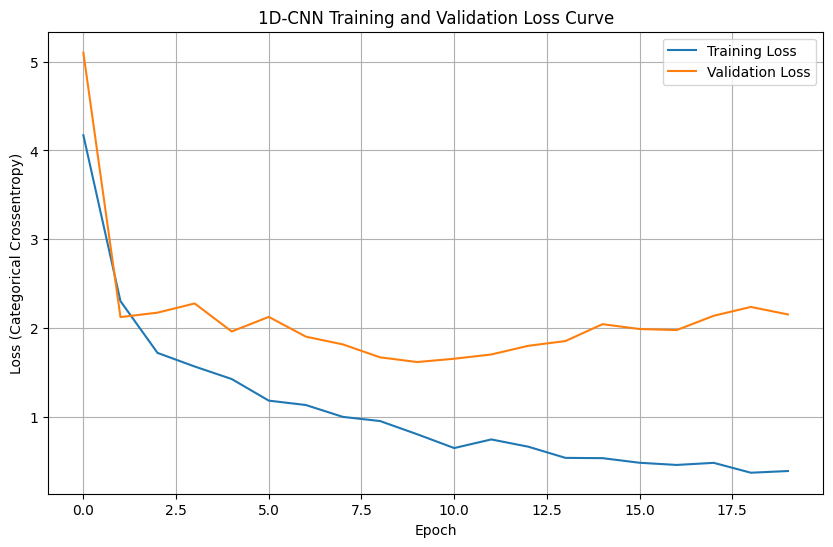

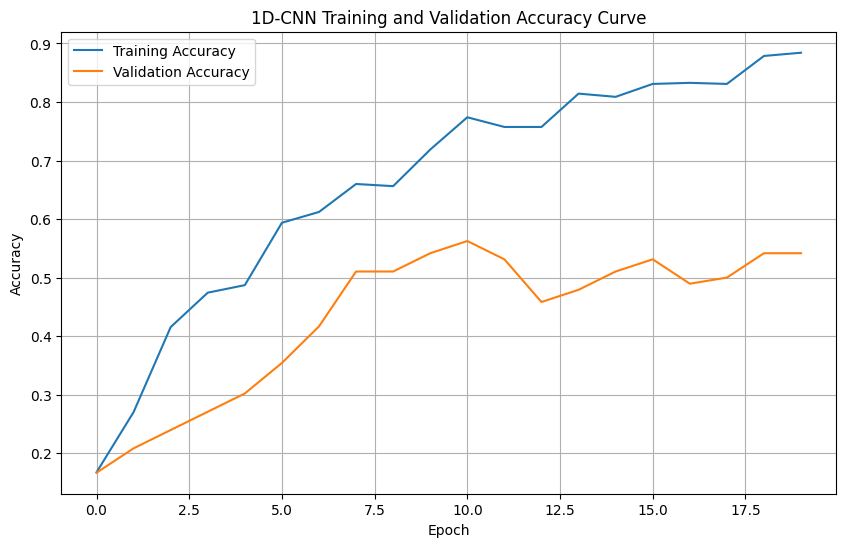

In [25]:
import matplotlib.pyplot as plt

# The 'history' object MUST be the variable generated from your cnn_model.fit() call

if 'history' in locals():
    # Plotting Training & Validation Loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('1D-CNN Training and Validation Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (Categorical Crossentropy)')
    plt.legend()
    plt.grid(True)
    plt.savefig('cnn_training_curve.png')
    plt.show()

    # Optional: Plotting Accuracy (Good secondary evidence)
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('1D-CNN Training and Validation Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig('cnn_accuracy_curve.png')
    plt.show()
else:
    print("Error: The 'history' object was not found. Please run this code immediately after training the 1D-CNN model.")

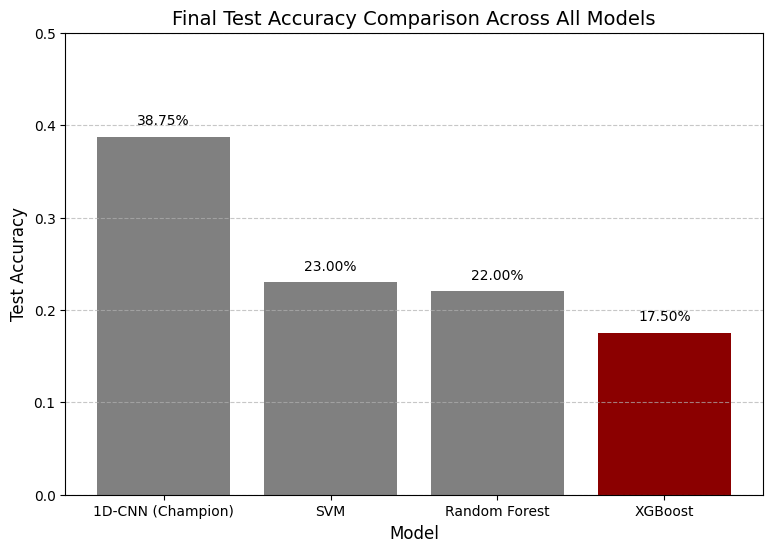

Model comparison chart displayed.


In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the final results comparison
data = {
    'Model': ['XGBoost', 'Random Forest', 'SVM', '1D-CNN (Champion)'],
    'Accuracy': [0.1750, 0.2200, 0.2300, 0.3875]
}
comparison_df = pd.DataFrame(data)
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

# --- Generate Model Comparison Bar Chart ---
plt.figure(figsize=(9, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=['gray', 'gray', 'gray', 'darkred'])
plt.title('Final Test Accuracy Comparison Across All Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom', fontsize=10)

plt.show() # Use plt.show() to display the chart instead of plt.savefig()

print("Model comparison chart displayed.")

# 5 Conclusions

**5.1 Comparative Results and Failure Analysis**

The research question was resolved: classical models on static features were insufficient, confirming the necessity of a sequential approach.

* Pipeline A (Static ML): Failed to generalize, achieving a best mean cross-validation accuracy of $\mathbf{23.00\%}$, which barely surpasses random chance ($\mathbf{12.5\%}$). This failure validates the hypothesis that collapsing the temporal context destroys the necessary distinguishing melodic information.

* Pipeline B (Sequential DL): The 1D-CNN successfully leveraged MFCC sequences, achieving a final test accuracy of $\mathbf{38.75\%}$ (Macro F1-Score: $\mathbf{0.382}$). This confirmed that only sequence-aware modelling can capture the required temporal patterns. The $\mathbf{+15.75}$ percentage point gain proves the 1D-CNN was the most effective among those tested methodology.

**5.2 Interpretation of Limitations and Methodological Rigor**

Despite the improvement, the $\mathbf{38.75\%}$ accuracy confirms the inherent difficulty of the task. Performance is constrained by:

* Acoustic Similarity: High similarity between hums/whistles leads to systematic confusion between specific song pairs.

* Data Scarcity: The small sample size ($\mathbf{N=800}$) limits the CNN's generalization capacity.

* Model Strengths: The $\mathbf{MFCC \text{ sequences}}$ were the most effective features, and the SVM was the strongest classical model.

* Methodological Trustworthiness: Confidence in the results stems from using Stratified 5-Fold CV for baselines and a strictly Held-Out Test Set coupled with Early Stopping for the 1D-CNN, mitigating overfitting and data leakage risks.

**5.3 Concrete Suggestions for Future Improvements**

To achieve production-level accuracy, future work must focus on representation and scale:

* Richer Temporal Features: Utilize full Mel-spectrograms (2D representation) with $\mathbf{2D \text{ CNNs}}$ to better capture frequency-time dynamics.

* Data Scale & Robustness: Implement advanced audio augmentation (time-stretching, pitch-shifting) to artificially increase training diversity and sample size.

* Advanced Architectures: Explore Recurrent Neural Networks (RNNs) or Transformer architectures to model long-range dependencies across the song's entire sequence.

The project definitively demonstrates that classical models are inadequate, while sequence-aware deep learning provides measurable gains, highlighting the vital role of temporal modelling for real-world query-by-humming systems.

# 8 References

* Davis, S., & Mermelstein, P. (1980). Comparison of parametric representations for monosyllabic word recognition in continuously spoken sentences. IEEE Transactions on Acoustics, Speech, and Signal Processing, 28(4), 357–366. (MFCC formulation and motivation).​

* Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). Scikit‑learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. (Classical models, preprocessing, and cross‑validation tools).​

* Chollet, F., et al. Keras: Deep Learning for humans. TensorFlow/Keras documentation on Conv1D layers for sequence modelling and audio/time‑series tasks. (1D‑CNN architecture and training practices).​

* McFee, B., Raffel, C., Liang, D., et al. Librosa: Audio and music signal analysis in Python. Proceedings of the 14th Python in Science Conference (SciPy). (Audio loading and feature extraction, including MFCC and spectrograms).​




**Core Libraries:**

NumPy

Pandas

Librosa

scikit-learn

Keras

TensorFlow

Matplotlib

Seaborn